In [36]:
import ctypes
import os
import glob
import time
import astropy.units as u
import astropy.io.fits as fits
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
from pocs.camera.fli import Camera

In [5]:
cam = Camera(port='/dev/fliusb0')

In [6]:
cam.uid

'ML5232816'

In [7]:
cam.ccd_temp

<Quantity 25.0625 deg_C>

In [8]:
cam.ccd_cooling_power

8.0

In [9]:
cam.ccd_set_point

<Quantity 25. deg_C>

In [10]:
cam.ccd_set_point = 10 * u.Celsius

In [11]:
cam.ccd_set_point

<Quantity 10. deg_C>

In [12]:
cam.ccd_cooling_power

8.0

In [13]:
print(cam)

FLI Camera (ML5232816) on /dev/fliusb0


In [14]:
cam._info

{'array corners': ((0, 0), (8304, 6220)),
 'array height': 6220,
 'array width': 8304,
 'camera model': 'MicroLine ML50100',
 'firmware version': 516,
 'hardware version': 256,
 'pixel height': <Quantity 6.00000021 um>,
 'pixel width': <Quantity 6.00000021 um>,
 'serial number': 'ML5232816',
 'visible corners': ((64, 45), (8240, 6177)),
 'visible height': 6132,
 'visible width': 8176}

In [43]:
for fname in glob.glob('*.fits'):
    os.unlink(fname)

In [44]:
time.sleep(10)
exp_event = cam.take_exposure(seconds=1, filename='light_1.fits')
exp_event.wait()

True

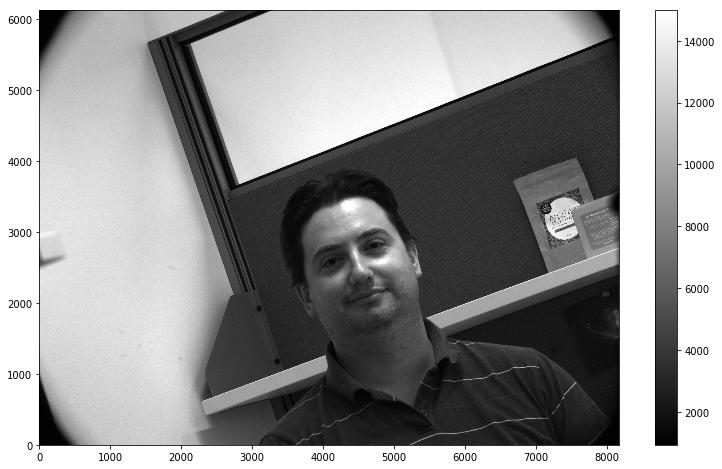

In [51]:
plt.imshow(fits.getdata('light_1.fits'), cmap='gray', aspect='equal', vmax=15000)
plt.colorbar()
plt.gcf().set_size_inches(13,8)

In [52]:
cam.take_exposure(seconds=1/60 * u.minute, filename='dark_1.fits', dark=True, blocking=True)

In [53]:
cam.take_exposure(seconds=1, filename='collision_1.fits')
cam.take_exposure(seconds=1, filename='collision_2.fits')